In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("weatherAUS.csv")
df=data.copy()

In [3]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
df.shape

(145460, 23)

In [5]:
import missingno as msno

<AxesSubplot:>

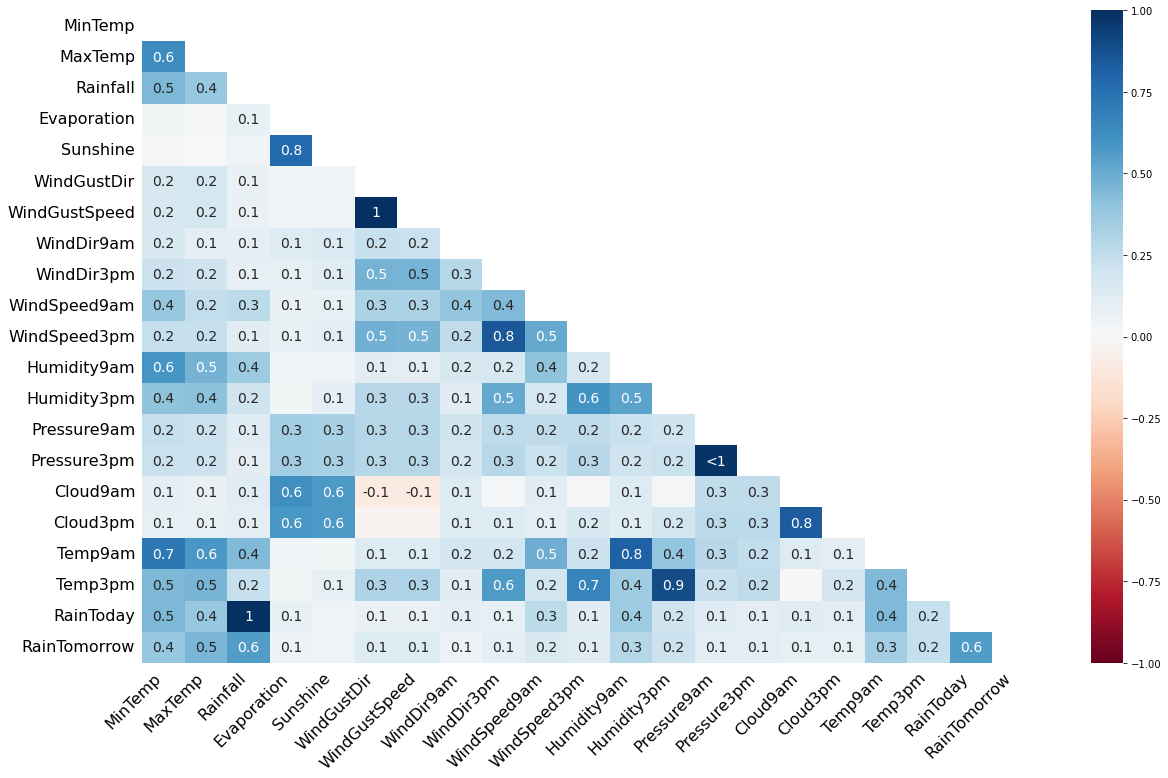

In [6]:
msno.heatmap(df)

<AxesSubplot:>

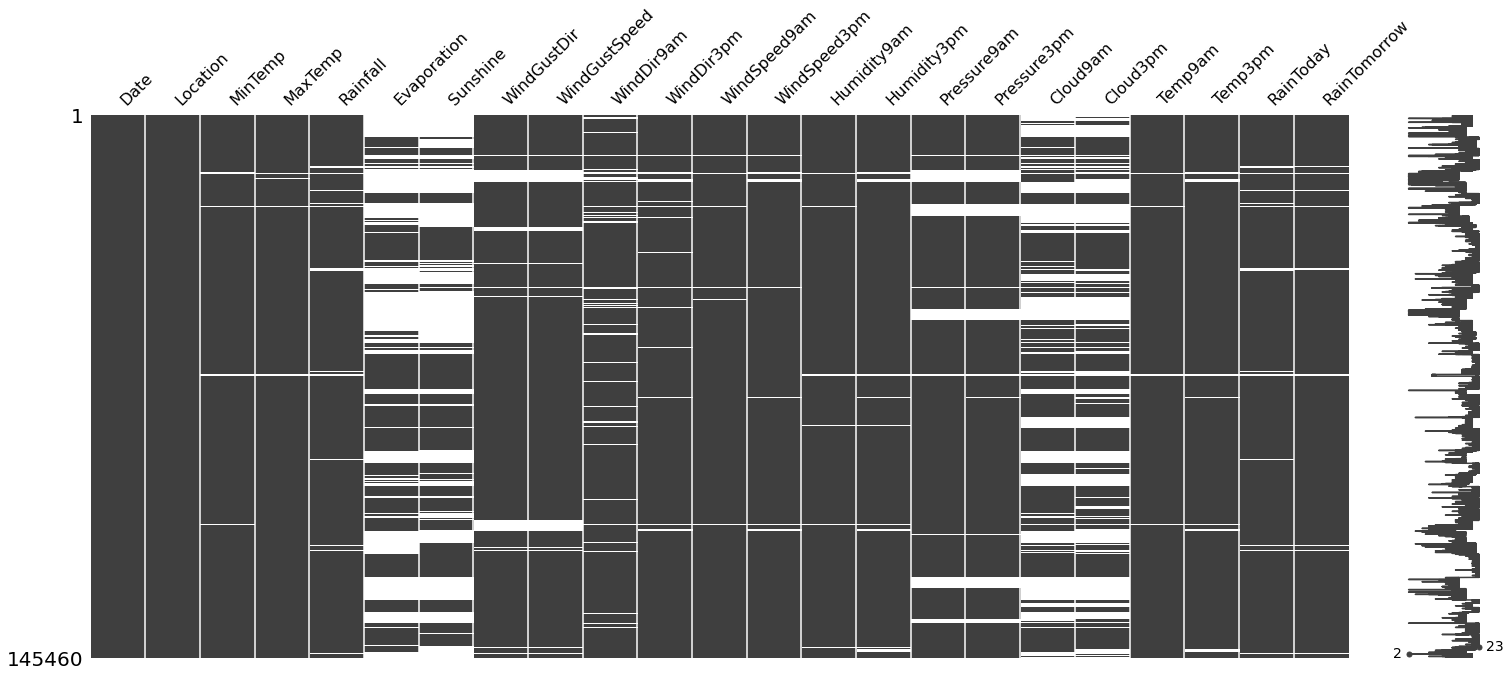

In [7]:
msno.matrix(df)

In [8]:
print('data shape', df.shape)
print("\n","Number of nulls in column: ","\n",df.isnull().sum())

data shape (145460, 23)

 Number of nulls in column:  
 Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64


In [9]:
df.drop(["Evaporation", "Sunshine", "Cloud9am", "Cloud3pm"], axis=1, inplace=True)

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

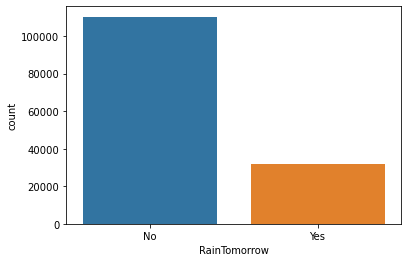

In [11]:

sns.countplot(x=df.RainTomorrow, data=df)
plt.show()

In [12]:
df.RainTomorrow.value_counts(normalize=True)

No     0.775819
Yes    0.224181
Name: RainTomorrow, dtype: float64

In [13]:
for i in df.columns:
    if df[i].dtype==object:
        df[i][df[i].isnull()]=df[i].mode()
    else:
        df[i][df[i].isnull()]=df[i].median()

df.dropna(axis=0, inplace=True)

C:\Users\ULIS\AppData\Local\Temp\ipykernel_26540\91471250.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i].isnull()]=df[i].mode()
C:\Users\ULIS\AppData\Local\Temp\ipykernel_26540\91471250.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i].isnull()]=df[i].mode()
C:\Users\ULIS\AppData\Local\Temp\ipykernel_26540\91471250.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i].isnull()]=df[i].median()
C:

In [14]:
df.isnull().sum().sum()

0

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
encoder = LabelEncoder()
for i in df.columns:
    if df[i].dtype==object:
        df[i]=encoder.fit_transform(df[i])

In [17]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,377,1,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,378,1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,379,1,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,380,1,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,381,1,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3411,39,3.5,21.8,0.0,0,31.0,2,0,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,0,0
145455,3412,39,2.8,23.4,0.0,0,31.0,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0,0
145456,3413,39,3.6,25.3,0.0,6,22.0,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0,0
145457,3414,39,5.4,26.9,0.0,3,37.0,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0,0


In [18]:
df.RainTomorrow.value_counts()

0    96318
1    27392
Name: RainTomorrow, dtype: int64

In [19]:
X = df.drop("RainTomorrow", axis=1)
y = df.RainTomorrow.values.reshape(-1,1)

In [20]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X = scaler.fit_transform(X)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y,random_state=19,shuffle=True)

In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

In [23]:
X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()
y_train = torch.from_numpy(y_train).float()
y_test = torch.from_numpy(y_test).float()

In [24]:
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

In [25]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, shuffle=True)

In [26]:
X.shape

(123710, 18)

In [27]:
# class Model(nn.Module):
#     def __init__(self):
#         super(Model,self).__init__()
        
#         self.fc1 = nn.Linear(18,500)
#         self.out = nn.Linear(500,1)
#     def forward(self,X):
#         X=F.relu(self.fc1(X))
#         X=self.out(X)
#         return X

In [28]:
class Model(nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        
        self.fc1 = nn.Linear(18, 2500)
        self.fc2 = nn.Linear(2500, 1250)
        self.out = nn.Linear(1250, 1)

    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.out(X)

        return X

In [29]:
model = Model()

In [30]:
# Define params
n_epochs = 15
learning_rate = 0.05
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [31]:
#creating supporting function
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc*100)
    return acc

In [32]:
model.train()

Model(
  (fc1): Linear(in_features=18, out_features=2500, bias=True)
  (fc2): Linear(in_features=2500, out_features=1250, bias=True)
  (out): Linear(in_features=1250, out_features=1, bias=True)
)

In [33]:
for i in range(1, n_epochs+1):
    epoch_loss = 0
    epoch_acc = 0

    for x_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(x_batch)
    
        loss = criterion(y_pred,y_batch.float())
        acc = binary_acc(y_pred, y_batch.float())

        loss.backward()
        optimizer.step()

        epoch_loss+= loss.item()
        epoch_acc+= acc.item()

    print(f'Epoch: {i+0:03}: |Loss: {epoch_loss/len(train_loader):.5f} |Acc: {epoch_acc/len(train_loader):.3f}')


Epoch: 001: |Loss: 0.38256 |Acc: 83.479
Epoch: 002: |Loss: 0.35583 |Acc: 84.592
Epoch: 003: |Loss: 0.34924 |Acc: 84.994
Epoch: 004: |Loss: 0.34668 |Acc: 85.101
Epoch: 005: |Loss: 0.34300 |Acc: 85.213
Epoch: 006: |Loss: 0.34020 |Acc: 85.369
Epoch: 007: |Loss: 0.33879 |Acc: 85.424
Epoch: 008: |Loss: 0.33633 |Acc: 85.501
Epoch: 009: |Loss: 0.33547 |Acc: 85.569
Epoch: 010: |Loss: 0.33392 |Acc: 85.668
Epoch: 011: |Loss: 0.33185 |Acc: 85.708
Epoch: 012: |Loss: 0.33045 |Acc: 85.716
Epoch: 013: |Loss: 0.32922 |Acc: 85.836
Epoch: 014: |Loss: 0.32788 |Acc: 85.882
Epoch: 015: |Loss: 0.32697 |Acc: 85.924


In [34]:
y_pred_list = []
model.eval()
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        torch.no_grad()
        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.numpy())
        
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test, y_pred_list))
print(classification_report(y_test, y_pred_list))

[[15487  3777]
 [ 4412  1066]]
              precision    recall  f1-score   support

         0.0       0.78      0.80      0.79     19264
         1.0       0.22      0.19      0.21      5478

    accuracy                           0.67     24742
   macro avg       0.50      0.50      0.50     24742
weighted avg       0.65      0.67      0.66     24742



In [36]:
y_pred_list

[0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0